In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


labelencoder = LabelEncoder()
%matplotlib inline

from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_item_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_info.csv
/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Original Data/Measurement_station_info.csv


In [9]:
data = pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [10]:
data.isna().sum()

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [11]:
BBox = ((data.Longitude.min(),   data.Longitude.max(), data.Longitude.mean(),       
         data.Latitude.min(), data.Latitude.max(), data.Latitude.mean()))
BBox        

(126.8351506,
 127.13679170000002,
 126.98933965679183,
 37.4523569,
 37.6587743,
 37.55348357387394)

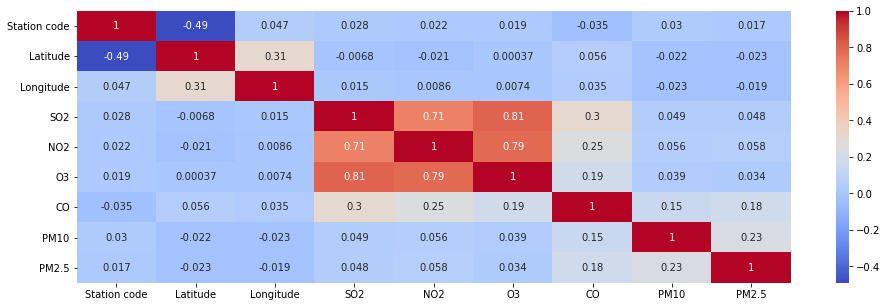

In [12]:
cols = data.columns[:50]
plt.figure(figsize = (16,5))
sns.heatmap(data[cols].corr(), annot = True, cmap= 'coolwarm', fmt='.2g')

In [13]:
#sns.swarmplot(x='NO2', y='O3', data=data)

In [14]:
train_data = [data['O3'],data['SO2'], data['NO2'], data['CO'], data['PM10'], data['PM2.5']]
headers = ["O3","SO2","NO2", "CO", "PM10", "PM2.5"]
dataset = pd.concat(train_data, axis=1, keys=headers)
dataset.head()

,O3,SO2,NO2,CO,PM10,PM2.5
0,0.002,0.004,0.059,1.2,73.0,57.0
1,0.002,0.004,0.058,1.2,71.0,59.0
2,0.002,0.004,0.056,1.2,70.0,59.0
3,0.002,0.004,0.056,1.2,70.0,58.0
4,0.002,0.003,0.051,1.2,69.0,61.0


In [15]:
dataset.dtypes

O3       float64
SO2      float64
NO2      float64
CO       float64
PM10     float64
PM2.5    float64
dtype: object

In [16]:
#dataset = pd.get_dummies(data, columns = ["NO2", "O3", "SO2"])

train = dataset[:int(len(data)/2)]
test = dataset[int(len(data)/2):]

y=train['O3']
X=train.drop('O3', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 473, random_state = 2)

In [17]:
model_1 = RandomForestClassifier(n_estimators=100)
model_1.fit(X_train.astype('int'), y_train.astype('int'))

predict1 = model_1.predict(X_val.astype('int'))
acuracy1 = accuracy_score(predict1, y_val.astype('int'))
print('Accuracy: ', acuracy1)

Accuracy:  1.0


<a id = "submit"></a>
# Submission

In [47]:
y_train = train['O3']
X_train = train[['SO2','NO2', 'CO', 'PM10', 'PM2.5']]

X_test = test[['SO2','NO2', 'CO', 'PM10', 'PM2.5']]
selected_columns = X_train[['SO2','NO2',  'CO', 'PM10', 'PM2.5']]
df1 = selected_columns.copy()

#y_train = y_train.reindex(X_test.index)
#X_train = X_train.reindex(X_test.index)
df1 = X_test.reindex(X_test.index)
df1 = df1[:-1]

In [54]:
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(df1.astype('int'), y_train.astype('int'))

final_predictions = final_model.predict(X_test)
output = pd.DataFrame({'Id': test.index, 'O3': final_predictions})
final_predictions = final_predictions[:-1]
final_accuracy = accuracy_score(final_predictions, y_train.astype('int'))
print('Accuracy: ', final_accuracy)

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Accuracy:  0.991187780883693
Your submission was successfully saved!
